## Business Understanding

Sarah sebagai regional sales manager ingin mengestimasi berapa banyak minyak pemanas (heating oil) yang harus disiapkan agar memenuhi permintaan customer baru. Dengan hal tersebut diharapkan dia dapat mengantisipasi adanya kelebihan atau kekurangan jumlah persediaan akan produk.

Objective: Predictive Stock Level untuk kecukupan pelanggan baru sebanyak 42.650 pelanggan. Pelanggan yang ada (current pelanggan) 1.218 pelanggan. Artinya Sarah harus mencukupi ketersediaan heating oil untuk 42.650 + 1.218 pelanggan.

Case --> Supervised Learning --> Estimasi

Algoritma Estimasi:
1. Linear Regression
2. ANN MLP (Multi Layer Perceptron)

## Data Understanding

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('heatingOilTrainingset.csv')
df.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


## Analisis Korelasi

<Axes: title={'center': 'Pearson Correlation'}>

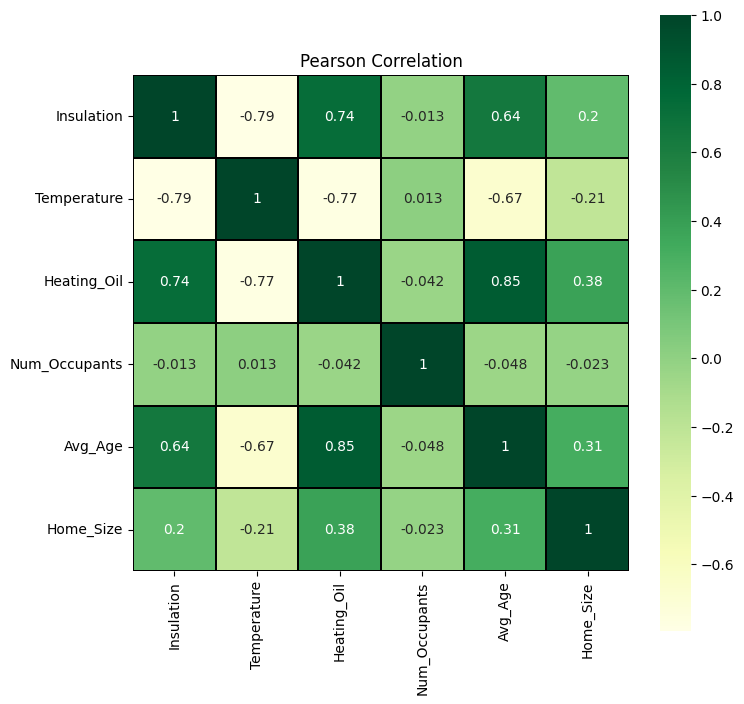

In [29]:
f, ax = plt.subplots(figsize = (8,8))
plt.title('Pearson Correlation')
sns.heatmap(df.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap='YlGn', linecolor='black', annot=True)

1. Ada hubungan positif menguatkan antara Insulation dengan Heating Oil
2. Ada hubungan negatif melemahkan antara Temperature dengan Heating Oil. Artinya semakin suhunya tinggi maka kebutuhan Heating Oil semakin sedikit
3. Ada hubungan negatif melemahkan antara Num_Occupants dengan Heating Oil. Artinya semakin banyak orang yang tinggal di rumah tersebut maka semakin sedikit kebutuhan Heating Oil. Hasil menunjukkan angka 0.042 (tidak signifikan) karena mendekati angka 0
4. Semakin banyak/tinggi usia rata-rata penghuni maka semakin tinggi kebutuhan Heating Oil
5. Tidak ada hubungan yang mempengaruhi secara signifikan antara Home Size dengan Heating Oil

## Data Preparation

In [30]:
x = df[['Insulation', 'Temperature', 'Avg_Age',	'Home_Size', 'Num_Occupants']] #Input Variabel
y = df['Heating_Oil'] #Target Variabel

## Pemodelan Data

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
# SPLITTING training & testing. 70% training dan 30% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# membuat object algoritma linear regression
ln = LinearRegression()

# memodelkan data menggunakan algoritma linear regression
model_ln = ln.fit(x_train, y_train)

# melakukan predict pada data test
pred_ln = model_ln.predict(x_test)

## Evaluasi Pemodelan Linear Regression

1. MAPE (Mean Absolute Percentage Error)
2. R2
3. MAE (Mean Absolute Error)

In [35]:
print('R Square :', metrics.r2_score(y_test, pred_ln))

R Square : 0.8113322126382521


In [36]:
def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('MAPE :',  mean_absolut_percentage_error(y_test,pred_ln))

MAPE : 7.845552048912456


## ANN (Artificial Neural Network)

In [37]:
from sklearn.neural_network import MLPRegressor

In [38]:
mlp = MLPRegressor()
model_mlp = mlp.fit(x_train, y_train)
pred_mlp = model_mlp.predict(x_test)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
print('R Square :', metrics.r2_score(y_test, pred_mlp))

R Square : 0.7692753216899872


In [40]:
print('MAPE :',  mean_absolut_percentage_error(y_test,pred_mlp))

MAPE : 7.5429603694112375


## Implementasi Model

In [41]:
df1 = pd.read_csv('heatingOilNewust.csv')
df1.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     42650 non-null  int64  
 1   Temperature    42650 non-null  int64  
 2   Num_Occupants  42650 non-null  int64  
 3   Avg_Age        42650 non-null  float64
 4   Home_Size      42650 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


In [43]:
x1 = df1[['Insulation', 'Temperature', 'Avg_Age', 'Home_Size', 'Num_Occupants']]

In [44]:
prediction = model_ln.predict(x1)
prediction

array([251.6324391 , 219.9304322 , 227.53697396, ..., 149.82176674,
       251.14963983, 221.43648617])

In [45]:
df_result = pd.DataFrame({'Prediction': prediction}).round(2)
df_result.head()

,Prediction
0,251.63
1,219.93
2,227.54
3,208.01
4,160.96


In [46]:
#Menggabungkan Data Frame hasil prediksi dengan Data Frame Input Variabel
df_pred = pd.concat([df1, df_result],sort=True, axis=1)
df_pred.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction
0,5,69,10,70.1,7,251.63
1,5,80,1,66.7,1,219.93
2,4,89,9,67.8,7,227.54
3,7,81,9,52.4,6,208.01
4,4,58,8,22.9,7,160.96


In [47]:
# Kebutuhan Heating Oil untuk New Customer
df_pred['Prediction'].sum()

8470686.92

In [48]:
# Kebutuhan Heating Oil untuk Customer yang sudah ada (current customer)
df['Heating_Oil'].sum()

240426

In [49]:
df_pred.to_csv(path_or_buf='./predict_heating_oil.csv', index= False)

Stock yang harus disediakan untuk New Customer = +- 8.377.333 liter

Kebutuhan Heating Oil untuk Customer yang sudah ada (current customer) 240.462